In [29]:
import tensorflow as tf
print("TensorFlow Running...")

TensorFlow Running...


In [30]:
import numpy as np
import os
import keras 
print("Keras Using TensorFlow Backend ...")

Keras Using TensorFlow Backend ...


In [31]:
path = "F:/Coding Ninjas ML/Projects/Image_Classification/natural_images/Training"
classes = os.listdir(path)
classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [32]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, Iterator, load_img

datagen = ImageDataGenerator(rescale=1/255, 
                             horizontal_flip= True,
                             validation_split=0.25)

training_data = datagen.flow_from_directory(path,
                                            target_size=(100,100),
                                            batch_size= 32,
                                            class_mode="categorical", subset="training",)

validation_data = datagen.flow_from_directory(path,
                                           target_size=(100,100),
                                           batch_size=32,
                                           class_mode="categorical", subset="validation")

Found 5119 images belonging to 8 classes.
Found 1702 images belonging to 8 classes.


In [33]:
print(training_data.image_shape)
print(training_data.num_classes)
print(training_data.samples)

(100, 100, 3)
8
5119


In [34]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from keras.optimizers import Adam


filter_size = (5,5)
kernal = 32
image_shape = training_data.image_shape
number_classes = training_data.num_classes
activation_relu = "relu"
activation_softmax = "softmax"


model = Sequential()

model.add(Conv2D(kernal, filter_size, input_shape= image_shape, activation= activation_relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(kernal, filter_size, activation= activation_relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(number_classes, activation= activation_softmax))

opt = Adam(lr=0.0001)

model.compile(loss= "categorical_crossentropy", optimizer= opt, metrics= ["accuracy"] )

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 44, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                

In [35]:
batch_size= 32
num_epochs = 30

history = model.fit_generator(training_data, 
                              steps_per_epoch= training_data.samples // batch_size, 
                              validation_data = validation_data,
                              validation_steps = validation_data.samples // batch_size,
                              epochs= num_epochs 
                             )

Epoch 1/30
159/159 [==============================] - 18s 110ms/step - loss: 1.3094 - accuracy: 0.5658 - val_loss: 0.9704 - val_accuracy: 0.7022
Epoch 2/30
159/159 [==============================] - 16s 101ms/step - loss: 0.6876 - accuracy: 0.7541 - val_loss: 0.7220 - val_accuracy: 0.7731
Epoch 3/30
159/159 [==============================] - 16s 101ms/step - loss: 0.5604 - accuracy: 0.7948 - val_loss: 0.4710 - val_accuracy: 0.7820
Epoch 4/30
159/159 [==============================] - 17s 104ms/step - loss: 0.4854 - accuracy: 0.8195 - val_loss: 0.3368 - val_accuracy: 0.8018
Epoch 5/30
159/159 [==============================] - 16s 101ms/step - loss: 0.4430 - accuracy: 0.8362 - val_loss: 0.4795 - val_accuracy: 0.8210
Epoch 6/30
159/159 [==============================] - 17s 106ms/step - loss: 0.4126 - accuracy: 0.8506 - val_loss: 0.5110 - val_accuracy: 0.8287
Epoch 7/30
159/159 [==============================] - 17s 104ms/step - loss: 0.3751 - accuracy: 0.8653 - val_loss: 0.3483 - val_ac

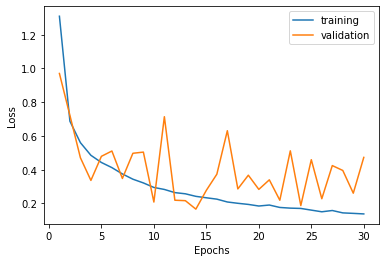

In [36]:
import matplotlib.pyplot as plt
epochs_num = range(1, num_epochs+1)
train_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

plt.plot(epochs_num, train_loss)
plt.plot(epochs_num, validation_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["training", "validation"])
plt.show()

In [150]:
test_path = "F:/Coding Ninjas ML/Projects/Image_Classification/natural_images/Testing"
test_images = os.listdir(test_path)

from PIL import Image
test_image = list()
for images in test_images:
    path_test_images = test_path +"/"+ images
    image = Image.open(path_test_images)
    resized = image.resize((100,100))
    resized_arr = np.array(resized)
    test_image.append(resized_arr)

In [151]:
test_image = np.array(test_image)

In [152]:
pred = model.predict(test_image)

In [153]:
def test_predict(index):
    class_name = classes[np.argmax(pred[index])]
    print("This Image is belong to "+class_name+" Category")
    plt.imshow(test_image[index])
    plt.show()

This Image is belong to car Category


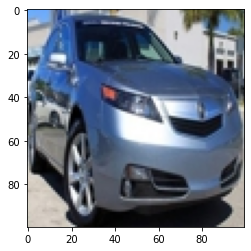

In [154]:
test_predict(12)

This Image is belong to person Category


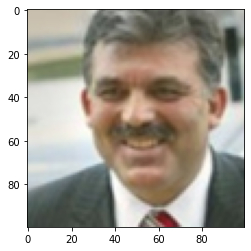

In [155]:
test_predict(76)

## Testing With our Own Image

In [164]:
def predict(image_path):
    open_image = Image.open(image_path)
    resized = open_image.resize((100,100))
    resized_arr = np.array(resized)
    own_test_image = np.array([resized_arr])
    pred = model.predict(own_test_image)
    class_name = classes[np.argmax(pred)]
    print(10*" ",class_name)
    plt.imshow(resized_arr)
    plt.show()

           person


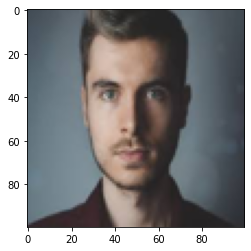

In [172]:
predict("test4.jpg")